# Wulffpack Tutorial

A short tutorial on how to use Wulffpack for create crystal structures, using [Wulff construction](https://en.wikipedia.org/wiki/Wulff_construction), and creating high-symmetry nanoparticles.

Wulffpack is available from `pip`, or to [download directly](https://wulffpack.materialsmodeling.org/). Once downloaded, we need to import what we need from the module. Let's start with a Wulff construction dependent on surface energies:


In [9]:
from wulffpack import SingleCrystal

This function will create a structure for us depending on the surface energies of different facets. To feed in the surface energies, we need to define them as a dictionary thus:

In [26]:
surface_energies = {(1, 1, 1): 1.0, 
                    (1, 0, 0): 1.2,
                    (1, 1, 0): 1.4,}

These surface energies, which could be calculated for instance with density functional theory calculations of slabs, are given in J/m^2 but can be any unit *as long as the ratio between surface energies is consistent*; i.e. values of `0.5`, `0.6` and `0.7` in the dictionary above would produce the same results from this tutorial!

The dictionary can  be fed into the `SingleCrystal` class to create a data object:

In [55]:
particle = SingleCrystal(surface_energies)

At this stage, we can see the structure generated by Wulff construction as with `view()`.

(Note: the `%matplotlib notebook` line is just to make this Figure interactive. Click and hold the right mouse button to zoom in/out)

<IPython.core.display.Javascript object>


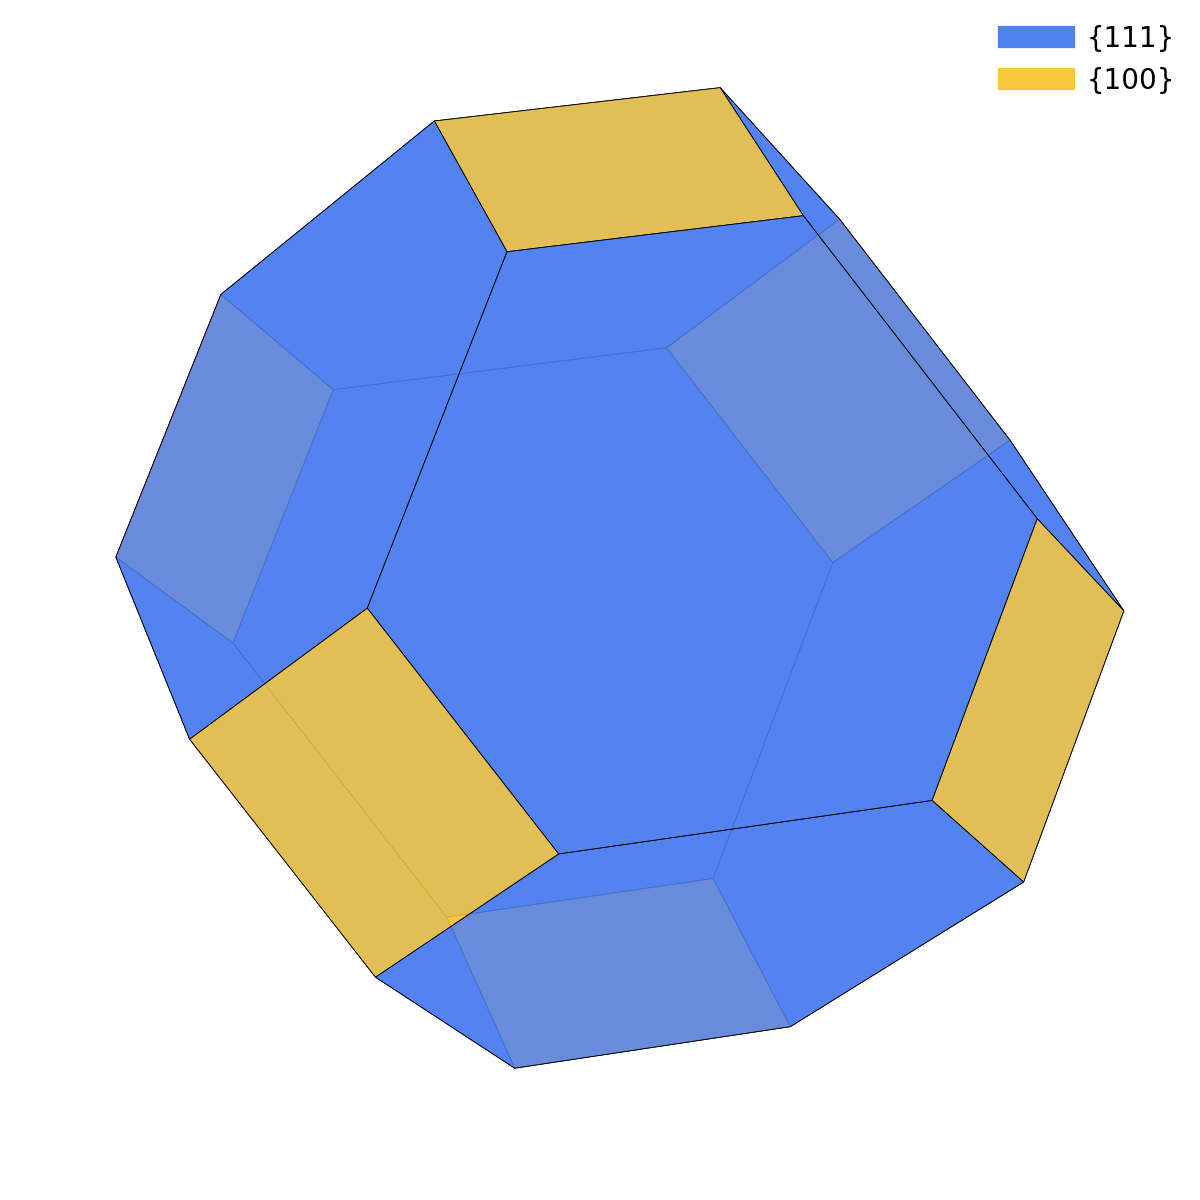

In [56]:
%matplotlib notebook
particle.view()

This is lovely to get a quick visualisation of a structure, but not very quantitatively informative. Let's get some useful information like the proportion of the surface composed of each facet type:

In [57]:
print('Surface fraction covered by each facet:')
for f in particle.facet_fractions:
    print(f, " : ", particle.facet_fractions.get(f))

Surface fraction covered by each facet:
(1, 1, 1)  :  0.8143535288039054
(1, 0, 0)  :  0.18564647119609462


Many more options, such as total surface energy, number of vertices and edge lengths, are available through the interface as defined on [documentation pages](https://wulffpack.materialsmodeling.org/moduleref/single_crystal.html).

One of the nice aspects with `Wulffpackage` is the macroscopic structures can be extracted as atomic structures for further scrutiny, e.g. in calculations of small nanoparticles. For this to work, we need to give the bulk structure of the parent materials for the, which can be easily achieved using `ase.build`

In [58]:
from ase.build import bulk
cell = bulk('Pd')

We can always check our bulk materials by visualizing with ASE, just so we know it is what we expect:

In [59]:
from ase.visualize import view
view(cell, viewer='x3d')

If we feed this structure into the `SingleCrystal` constructor, along with the approximate number of atoms we want to get in our nanoparticle, we can then obtain the nanoparticle:

In [60]:
particle = SingleCrystal(surface_energies, 
                         primitive_structure=cell,
                         natoms=100)
view(particle.atoms, viewer='x3d')

This atomic structure, `particle.atoms` can then be manipulated/saved/optimised in the normal way with ASE.

As a final note, whilst this approach will typically give to cuts of a primitive unit cell, it is also possible to produce high-symmetry [`decahedron`](https://wulffpack.materialsmodeling.org/moduleref/decahedron.html) and [`icosahedron`](https://wulffpack.materialsmodeling.org/moduleref/icosahedron.html) nanoparticle structures using the same infrastructure:

In [61]:
from wulffpack import Decahedron
particle = Decahedron(surface_energies,
                      twin_energy=0.1,
                      primitive_structure=cell,
                      natoms=150)
view(particle.atoms, viewer='x3d')

where `twin_energy` is necessary as the "Energy per area for twin boundaries". 